# Fast Fourier Transform

In [136]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
import math
import IPython.display
from PIL import Image
import os

In [137]:
def imshow(image, width=None):
    _, ret = cv2.imencode('.jpg', image)
    i = IPython.display.Image(data=ret, width=width)
    IPython.display.display(i)

In [138]:
def jpg_to_pgm(jpg_path, pgm_path):
    # Abre la imagen JPG
    image = Image.open(jpg_path)

    # Convierte la imagen a escala de grises
    image_gray = image.convert('L')

    # Guarda la imagen en formato PGM
    image_gray.save(pgm_path)

def interpret_pgm(pgm_path):
    # Abre la imagen PGM
    image = Image.open(pgm_path)

    # Obtiene la información de la imagen
    width, height = image.size
    max_gray_value = image.getextrema()[1]

    # Accede a los píxeles de la imagen
    pixels = list(image.getdata())
    # Haces algo con los píxeles...
    # Por ejemplo, puedes imprimir los valores de los primeros 10 píxeles
    return pixels

    # Puedes realizar cualquier otra operación que necesites con los píxeles

# Ruta del archivo JPG
jpg_file = '/home/juanca632/PersonalProjects/stage/wavelet-transform/image_color.jpg'

# Ruta del archivo PGM de salida
pgm_file = 'imagen.pgm'

# Transformar JPG a PGM
jpg_to_pgm(jpg_file, pgm_file)

# Interpretar el archivo PGM
pixels = interpret_pgm(pgm_file)
pixels = np.array(pixels)
pixels = pixels.reshape((512, 512))


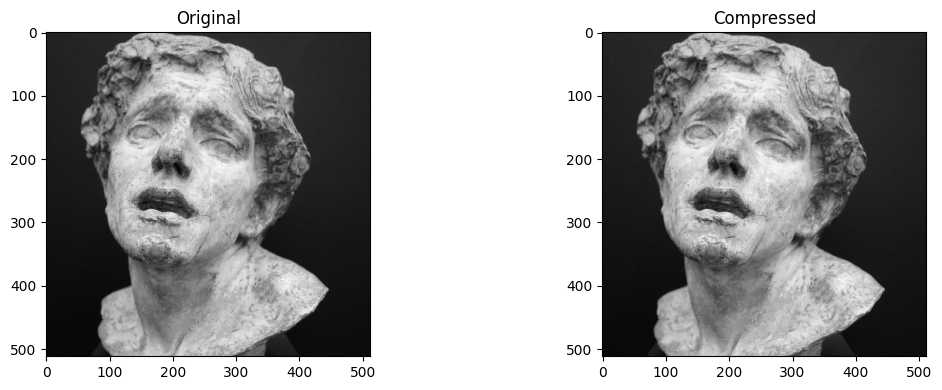

In [139]:
def compress_image(image, compression_ratio):

    # Aplicar la FFT a la imagen
    fft_image = np.fft.fftshift(np.fft.fft2(image))
    
    # Calcular el umbral para la cuantización
    fft_magnitude = np.abs(fft_image)
    sorted_coefs = np.sort(fft_magnitude.flatten())
    threshold_idx = int((1 - compression_ratio) * len(sorted_coefs))
    threshold = sorted_coefs[threshold_idx]
    
    # Aplicar la cuantización a los coeficientes
    quantized_coefs = fft_image * (fft_magnitude >= threshold)
    
    # Reconstruir la imagen a partir de los coeficientes cuantizados
    compressed_image = np.fft.ifft2(np.fft.ifftshift(quantized_coefs))
    compressed_image = np.abs(compressed_image).astype(np.uint8)
    
    return compressed_image

# Ejemplo de uso
image_path = pixels
compression_ratio = 0.5  # Reducción del 50% en el tamaño del archivo

cv2.imwrite("image_pgm.jpg", pixels)


compressed_image = compress_image(image_path, compression_ratio)

cv2.imwrite("compressed_image.jpg", compressed_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].imshow(pixels, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(compressed_image, cmap='gray')
axs[1].set_title('Compressed')

plt.tight_layout()
plt.show()



In [140]:
image_path = "image_pgm.jpg"
compressed_image_path = "compressed_image.jpg"

# Tamaño de la imagen original
original_size = os.path.getsize(image_path)
print("Tamaño de la imagen original:", original_size, "bytes")

# Tamaño de la imagen comprimida
compressed_size = os.path.getsize(compressed_image_path)
print("Tamaño de la imagen comprimida:", compressed_size, "bytes")

# Diferencia de tamaño
size_difference = original_size - compressed_size
print("Diferencia de tamaño:", size_difference, "bytes")


Tamaño de la imagen original: 82150 bytes
Tamaño de la imagen comprimida: 87000 bytes
Diferencia de tamaño: -4850 bytes
